## Descriptive Statistics

In [1]:
#Import necessary libraries

from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/MayureshShilotri/26-Weeks-Of-Data-Science/master/Week-07-Inferential_Stats/data/train.csv")

In [4]:
Sales_price = pd.Series(data['SalePrice'])

mean = np.mean(Sales_price)
print(mean)

180921.19589041095


In [6]:
# Median for sales price

median = np.median(Sales_price)
print("Median:",median)

q1 = Sales_price.quantile(0.25) # upper quartile  } Note: The fuction is .quantile() with 'n'
q3 = Sales_price.quantile(0.75) # lower quartile  }       not .quartile() with 'r'
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

Median: 163000.0
Q1: 129975.0
Q3: 214000.0
IQR: 84025.0


That is almost a difference of around 20000. This set of observations is definitely skewed

## Box plot

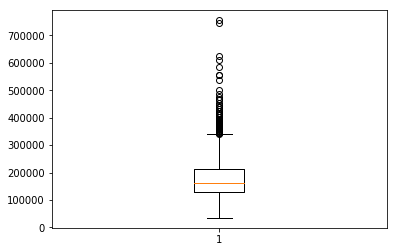

In [7]:
plt.boxplot(Sales_price)
plt.show()

In [10]:
# Enter Code to find no. of outliers

outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print("outlier_lower_limit:", outlier_lower_limit)
print("outlier_upper_limit:", outlier_upper_limit)

outlier_lower_limit: 3937.5
outlier_upper_limit: 340037.5


In [11]:

lower_limit_outliers = Sales_price[Sales_price < outlier_lower_limit].count()
upper_limit_outliers = Sales_price[Sales_price > outlier_upper_limit].count()
print("lower_limit_outliers:", lower_limit_outliers)
print("upper_limit_outliers:", upper_limit_outliers)
print("total outliers:", upper_limit_outliers + lower_limit_outliers)

lower_limit_outliers: 0
upper_limit_outliers: 61
total outliers: 61


### Skewness

- Although the Box & Whisker plot is a good method to get an intution on the number of outliers; another good way to find out if we need to consider the median is by checking the: Skewness in distribution.
- We know that the Median is more robust to outliers than the mean, thus giving us a better estimate of the "Central Tendency" of our dataset!

### Plot a Histogram of the data

- Let's plot a histogram, which is nothing but a Frequency Plot of the no. of times the values in our particular data are observed!
- These values are arranged in "bins"
- Each "bin" is a range of values and their height (or y-values) determine <b> The number of times values in THAT range appear in our dataset! </b>
- Let's code and have a look at the Histogram of our predictor

(array([  5.,   6.,  11.,  27.,  50.,  49.,  98., 134., 148., 125., 107.,
        111., 106.,  70.,  53.,  51.,  48.,  45.,  31.,  27.,  28.,  14.,
         13.,  22.,  11.,  13.,   4.,   6.,   9.,   8.,   5.,   3.,   4.,
          3.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  46901.66666667,  58903.33333333,  70905.        ,
         82906.66666667,  94908.33333333, 106910.        , 118911.66666667,
        130913.33333333, 142915.        , 154916.66666667, 166918.33333333,
        178920.        , 190921.66666667, 202923.33333333, 214925.        ,
        226926.66666667, 238928.33333333, 250930.        , 262931.66666667,
        274933.33333333, 286935.        , 298936.66666667, 310938.33333333,
        322940.        , 334941.66666667, 346943.33333333, 358945.        ,
        370946.66666667, 382948.33333333, 394950.        ,

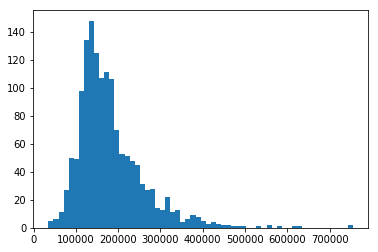

In [14]:
plt.hist(Sales_price, bins=60)

- By just looking, we can tell that the Histogram is not peaked around the center of ranges
- The peak is towards the left of the plot. Thus, we see that our Histogram is "Positively Skewed"

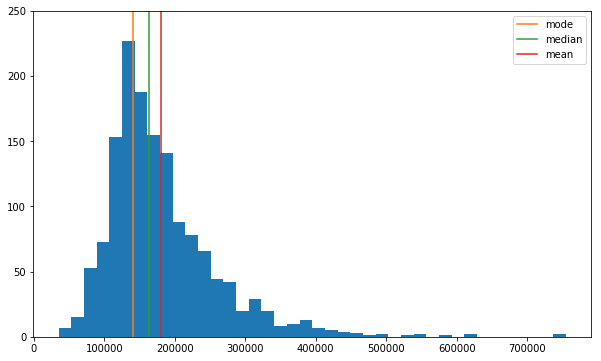

In [20]:
## plot the hist with mean median and mode - This needs to be checked! 
mode = Sales_price.mode()
plt.figure(figsize=(10, 6)) 
plt.hist(Sales_price, bins=40)
plt.plot([mode]*300, range(300), label='mode') 
plt.plot([median]*300, range(300), label='median')
plt.plot([mean]*300, range(300), label='mean')
plt.ylim(0, 250)
plt.legend()

### Mean 

The mean is usually the best measure of central tendency to use when your data distribution is continuous and symmetrical, such as when your data is normally distributed.

However, it all depends on what you are trying to show from your data.

### Mode
- The mode is the least used of the measures of central tendency

- The mode will be the best measure of central tendency (as it is the only one appropriate to use) when dealing with nominal data.

- The mean and/or median are usually preferred when dealing with all other types of data, but this does not mean it is never used with these data typesThe mode is the least used of the measures of central tendency

### Median

- The median is usually preferred to other measures of central tendency when your data set is skewed (i.e., forms a skewed distribution) or you are dealing with ordinal data.

- However, the mode can also be appropriate in these situations, but IS NOT as commonly used as the median.


#### What is the most appropriate measure of central tendency when the data has outliers?
The median is usually preferred in these situations because the value of the mean can be distorted by the outliers.

However, it will depend on how influential the outliers are. If they do not significantly distort the mean, using the mean as the measure of central tendency will usually be preferred.

#### In a normally distributed data set, which is greatest: mode, median or mean?
If the data set is perfectly normal, the mean, median and mean are equal to each other (i.e., the same value).

#### For any data set, which measures of central tendency have only one value?
The median and mean can only have one value for a given data set. The mode can have more than one value


<b> Nominal variables </b> are categorical variables that have two or more categories, but which do not have an intrinsic order.

##### For example

a real estate agent could classify their types of property into distinct categories such as houses, condos, co-ops or bungalows. So "type of property" is a nominal variable with 4 categories called houses, condos, co-ops and bungalows.
Of note, the different categories of a nominal variable can also be referred to as groups or levels of the nominal variable.



### Spread of Data

- Let's choose the value 250,000 from the SalePrice column and check how far this value is from the mean when compared to other points in the data set
- We measure this as follows:
      (250,000 - mean)/Random Variation
- We know the mean, we found that before

What is Random Variation?
    - It's nothing but the Average variation of the data from the mean
    - It can be calculated using Range, Variance or Standard Deviation
    - Always its recommended to use Std Deviation as Random Variation

How do we measure this?

Range of data is simply:
    Max Value of Data - Min Value of data


In [21]:
Range = np.max(Sales_price)-np.min(Sales_price)
Range

720100

In [22]:
# Mean squared distance from the mean

variance = Sales_price.var()
print(variance)

#Standard Deviation is square root of variance
from math import sqrt

std = sqrt(variance)
print(std)

6311111264.297451
79442.50288288663


In [25]:
spread_of_data = (250000 - mean)/std
spread_of_data

0.8695446593799336

## Standard Normal Distribution

If we know that our data is Normally Distributed, we can confidently say that:
- ~68% of the data is within one Std. Dev. from the mean
- ~95% of the data is within 2 Std. Dev. from the mean
- ~99.7% of the data is within 3 Std Dev from the mean


## Correlation

- Now what if we want to know how the price is affected by different factors such as the Living Room area, Garage Area, etc which are some of the other columns/features in our dataset. This is nothing but Correlation!

- A good way to determine this correlation is to use an already existing method known as Pearson Correlation Coefficient
- Correlation Coefficient is a measure of linear reationship between two variables
- It always outputs in the range of [-1,1]
- This is a bit complicated but easy when you break it down
$$ r = \frac{N\sum xy - (\sum x)(\sum y)}{\sqrt {[N\sum x^2 -(\sum x)^2][N\sum y^2 -(\sum y)^2]}} $$
$
\begin{align}
Where :  
\end{align}
$

$
\begin{align}
N = Number\thinspace of\thinspace pairs\thinspace of\thinspace scores 
\end{align}
$

$
\begin{align}
\sum xy = sum\thinspace of\thinspace the\thinspace products\thinspace of\thinspace paired\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum x = sum\thinspace of\thinspace x\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum y = sum\thinspace of\thinspace y\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum x^2 = sum\thinspace of\thinspace squared\thinspace x\thinspace scores\thinspace 
\end{align}
$

$
\begin{align}
\sum y^2 = sum\thinspace of\thinspace squared\thinspace y\thinspace scores\thinspace 
\end{align}
$


Understanding values:
- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- A result of zero indicates a non-linear relationship or no relationship at all.
- A correlation coefficient of 1 means that for every positive increase of 1 in one variable, there is a positive increase of 1 in the other.
- A correlation coefficient of -1 means that for every positive increase of 1 in one variable, there is a negative decrease of 1 in the other.
- Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

In [26]:
#What is the Correlation between the Sales price and the Living Room Area?

living_room_area = data.GrLivArea

np.corrcoef(Sales_price, living_room_area)[0,1]  # Returns Pearson product-moment correlation coefficients.

0.7086244776126521

The absolute value of the correlation coefficient gives us the relationship strength. The larger the number, the stronger the relationship. For example, |-.75| = .75, which has a stronger relationship than .65.

Also, we can creatively plot "heatmaps" in Python to make our plot fancy and see the Correlation trends between Several variables!This is a very handy trick used by Data Scientists All over the world!

The next slide displays the code where The Correlation trends amongst the "Lot Area", Living Room Area, Garage Area and Sales Price of the house are captured!

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.263116    0.180403   0.263843
GrLivArea   0.263116   1.000000    0.468997   0.708624
GarageArea  0.180403   0.468997    1.000000   0.623431
SalePrice   0.263843   0.708624    0.623431   1.000000


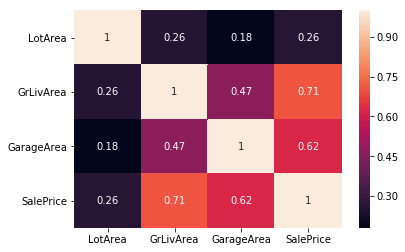

In [28]:
#considering 4 continous variable and finding the correlation
import seaborn as sns
%matplotlib inline
x = data[['LotArea','GrLivArea','GarageArea','SalePrice']]
corr = x.corr()      # Computes pairwise correlation of columns excluding NaNs
sns.heatmap(corr,annot=True)
print(corr)

### Correlation doesn't imply Causation
However, correlation does not imply causation. There may be, for example, an unknown factor that influences both variables similarly.

Causation indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

A statistically significant correlation has been reported, for example, between yellow cars and a lower incidence of accidents. That does not indicate that yellow cars are safer, but just that fewer yellow cars are involved in accidents. A third factor, such as the personality type of the purchaser of yellow cars, is more likely to be responsible than the color of the paint itself.